In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

# Display basic info
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [9]:
print(df.isnull().sum())

df.loc[:, 'Distance_from_Home'] = df['Distance_from_Home'].fillna('Near')

mode_value = df['Family_Income'].mode()[0]
df.loc[:, 'Family_Income'] = df['Family_Income'].fillna(mode_value)

from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                   'Motivation_level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                   'School_type', 'Peer_Influence', 'Learning_Dissibilities', 'Parental_Education_Level',
                   'Distance_from_Home', 'Gender']

label_encoders = {}
for col in categorical_cols:
    if col in df.columns: 
        le = LabelEncoder()
        df.loc[:, col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    else:
        print(f"Column {col} not found in DataFrame")

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64
Column Motivation_level not found in DataFrame
Column School_type not found in DataFrame
Column Learning_Dissibilities not found in DataFrame


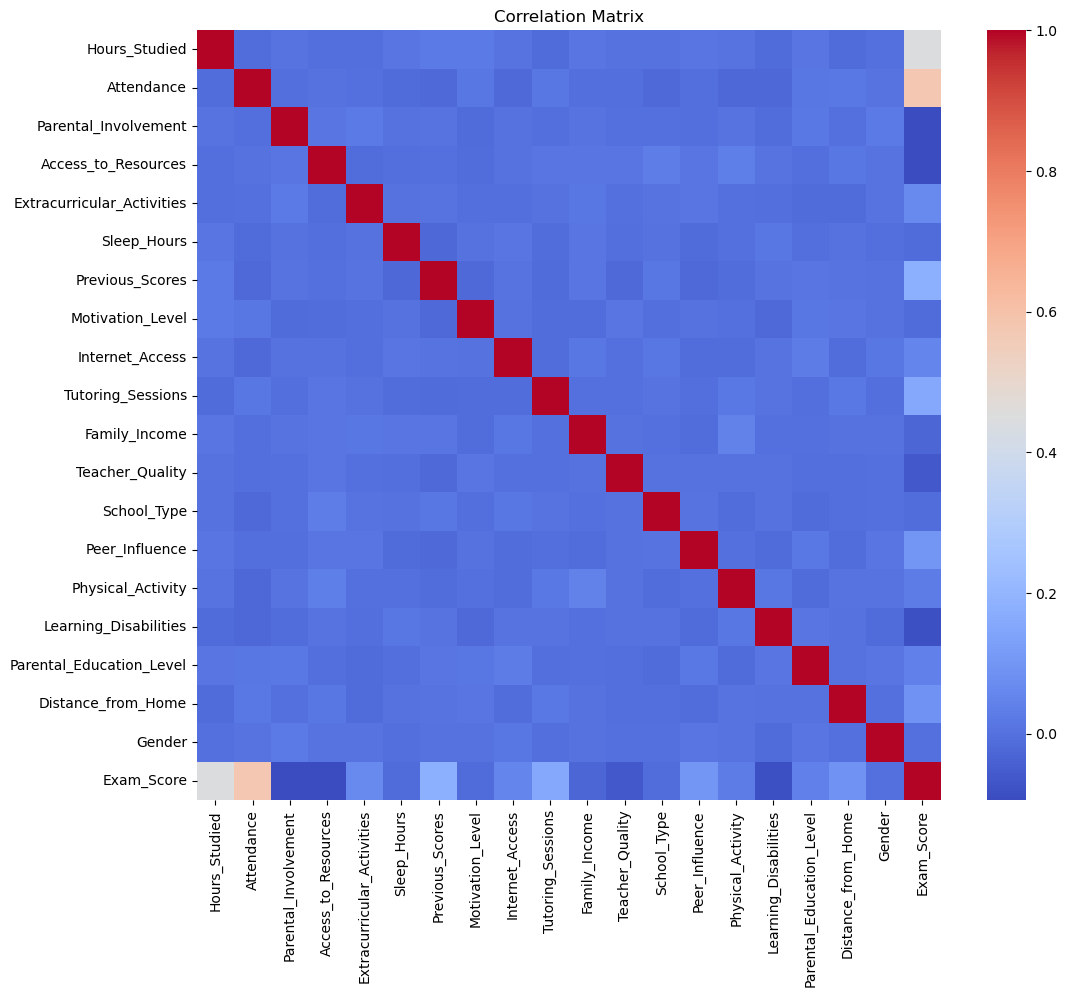

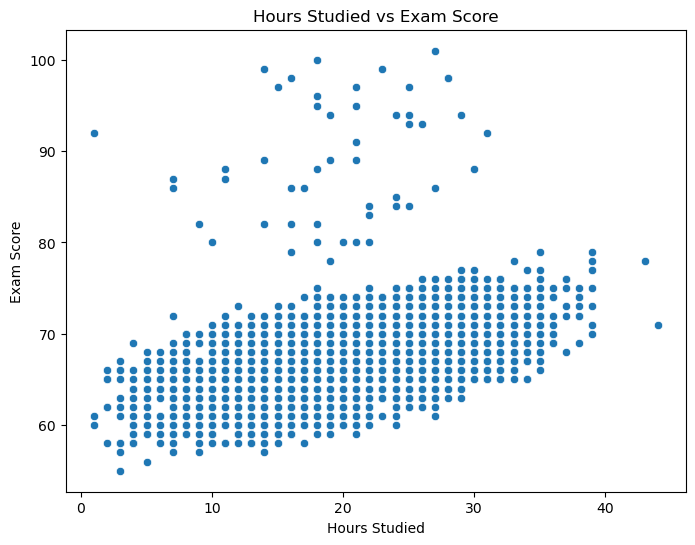

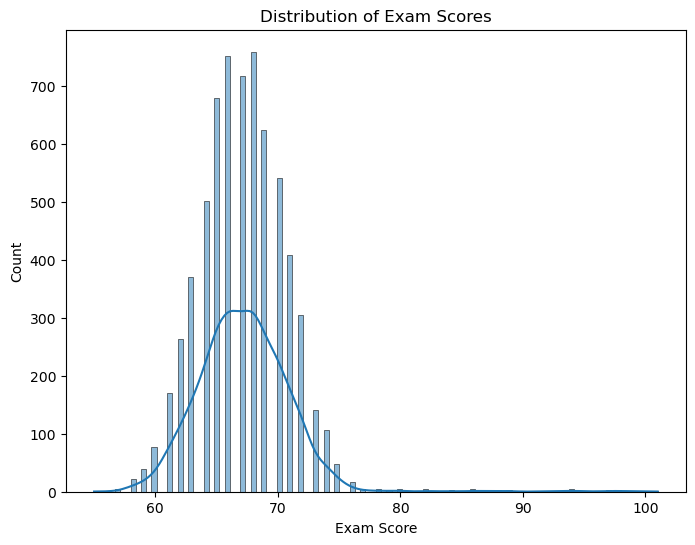

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Exam_Score'], kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.show()

Linear Regression Results (using only Hours_Studied):
RMSE: 3.29
R-squared: 0.23


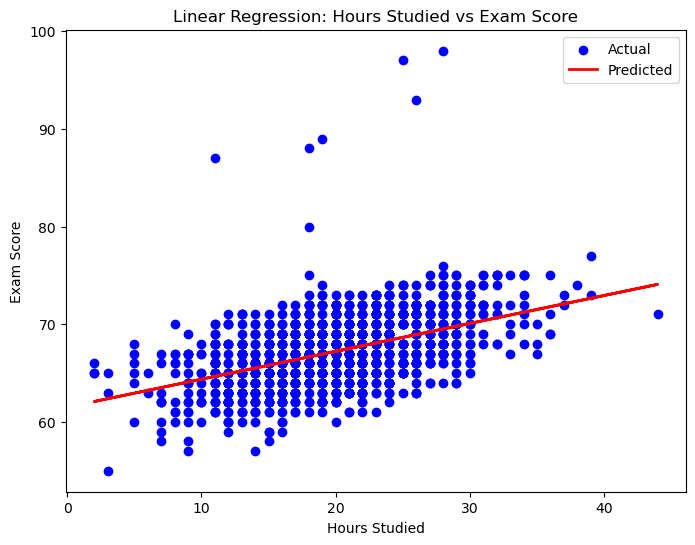

In [13]:
X = df[['Hours_Studied']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Results (using only Hours_Studied):")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()


Polynomial Regression (degree=2) Results:
RMSE: 3.29
R-squared: 0.23


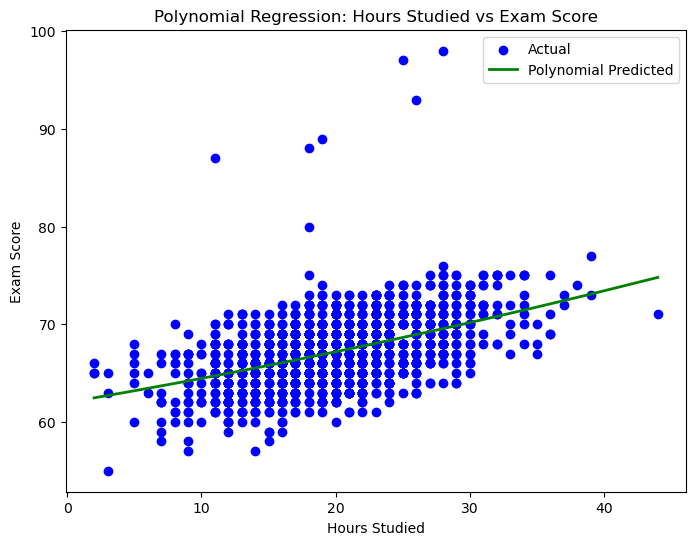

In [15]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_lr = LinearRegression()
poly_lr.fit(X_poly_train, y_train)

y_poly_pred = poly_lr.predict(X_poly_test)

poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(y_test, y_poly_pred)

print(f"\nPolynomial Regression (degree=2) Results:")
print(f"RMSE: {poly_rmse:.2f}")
print(f"R-squared: {poly_r2:.2f}")

sorted_idx = np.argsort(X_test.values.flatten())
X_sorted = X_test.values.flatten()[sorted_idx]
y_test_sorted = y_test.values[sorted_idx]
y_poly_pred_sorted = y_poly_pred[sorted_idx]

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_sorted, y_poly_pred_sorted, color='green', linewidth=2, label='Polynomial Predicted')
plt.title('Polynomial Regression: Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

In [17]:
features = ['Hours_Studied', 'Previous_Scores', 'Sleep_Hours', 'Attendance', 'Motivation_Level']
X_multi = df[features]

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y, test_size=0.2, random_state=42)

multi_lr = LinearRegression()
multi_lr.fit(X_train_multi, y_train_multi)

y_multi_pred = multi_lr.predict(X_test_multi)

multi_mse = mean_squared_error(y_test_multi, y_multi_pred)
multi_rmse = np.sqrt(multi_mse)
multi_r2 = r2_score(y_test_multi, y_multi_pred)

print(f"\nMultiple Linear Regression Results (using {features}):")
print(f"RMSE: {multi_rmse:.2f}")
print(f"R-squared: {multi_r2:.2f}")

coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': multi_lr.coef_
})
print("\nFeature Coefficients:")
print(coefficients)


Multiple Linear Regression Results (using ['Hours_Studied', 'Previous_Scores', 'Sleep_Hours', 'Attendance', 'Motivation_Level']):
RMSE: 2.31
R-squared: 0.62

Feature Coefficients:
            Feature  Coefficient
0     Hours_Studied     0.288139
1   Previous_Scores     0.047158
2       Sleep_Hours    -0.037312
3        Attendance     0.199166
4  Motivation_Level    -0.144916


In [20]:
results = pd.DataFrame({
    'Model': ['Simple Linear', 'Polynomial (deg=2)', 'Multiple Linear'],
    'RMSE': [rmse, poly_rmse, multi_rmse],
    'R-squared': [r2, poly_r2, multi_r2]
})

print("\nModel Comparison:")
print(results)


Model Comparison:
                Model      RMSE  R-squared
0       Simple Linear  3.294833   0.231987
1  Polynomial (deg=2)  3.293173   0.232760
2     Multiple Linear  2.309672   0.622599
